# Cel ćwiczenia

Celem tego zadania jest stworzenie sieci neuronowej zdolnej do rozpoznawania czy twarz człowieka pokazana na zdjęciu jest prawdziwa, czy fałszywa (na zdjęciu została doklejona część innej twarzy).

# Zbiór danych

Dostaliśmy dane dla $3$ poziomów trudności fałszywych twarzy, oraz jeden większy zestaw zdjęć prawdziwych twarzy. Jedyną operacją zastosowaną do dostarczonych twarzy jest zeskalowanie wartości liczbowych pikseli z przedziału $[0, 255]$ do wartości z przedziału $[0, 1]$.
Dodatkowo niektóre zdjęcia zostały odbite lustrzanie oraz obrócone.

# Zaproponowany model

W zadaniu jako najlepszy został wybrany model składający się z poniższych warstw:
1. warstwa wejściowa ($\ast$);
1. wartswa skaluja ($\ast$);
1. wartswa konwolucji ($\ast$);
1. warstwa poolująca (MaxPooling) ($\ast$);
1. wartswa konwolucji;
1. warstwa poolująca (MaxPooling);
1. warstwa wypłaszczająca ($\ast$);
1. warstwa $100$ neuronów ($\ast$) z uciętymi $15\%$ połączeń wejściowych;
1. warstwa $200$ neuronów z uciętymi $15\%$ połączeń wejściowych;
1. wyjściowa wartwa 2 neuronów ($\ast$).

Wybrany dla tego modelu solver to "RMSprop", o współczynniku uczenia $0.001$, oraz funkcji straty "categorical_crossentropy".

Wartwy z symbolem ($\ast$) oznaczają, że są one elementami bazowymi tworzonego modelu.

# Metodyka rozwiązywania zadania

Po wyjściu od bazowego modelu, w odpowiednich kolejnościach:
* zmieniałem solver oraz funkcję straty modelu;
* dodawałem:
  *  warstwę konwolucji/poolingu;
  * dodowałem wartwę neuronów;
* blokowałem część połączeń w istniejących warstwach neuronów.





# Zestawienie wyników

Wyniki są przedstawiane na procesie uczenia modeli przebiegającym na $50$ epokach. Zestawiane są jedynie wybrane modele, z solverem 'adam' oraz funkcją straty 'categorical entropy'.

W poniższych zestawieniach wyrażenie "pre" oznacza moduł wartsw składający się z warstwy konwolucji o rozmiarze jądra $3$ na $3$ oraz dwóch filtrach i warstwy poolującej o rozmiarze $2$ na $2$, baza oznacza sieć opisaną za pomocą $(\ast)$ w poprzedniej sekcji "Zaproponowany model", a dropout - dołożoną jedną warstę neuronów z dropoutem $15\%$.

(-0.5, 4799.5, 2399.5, -0.5)

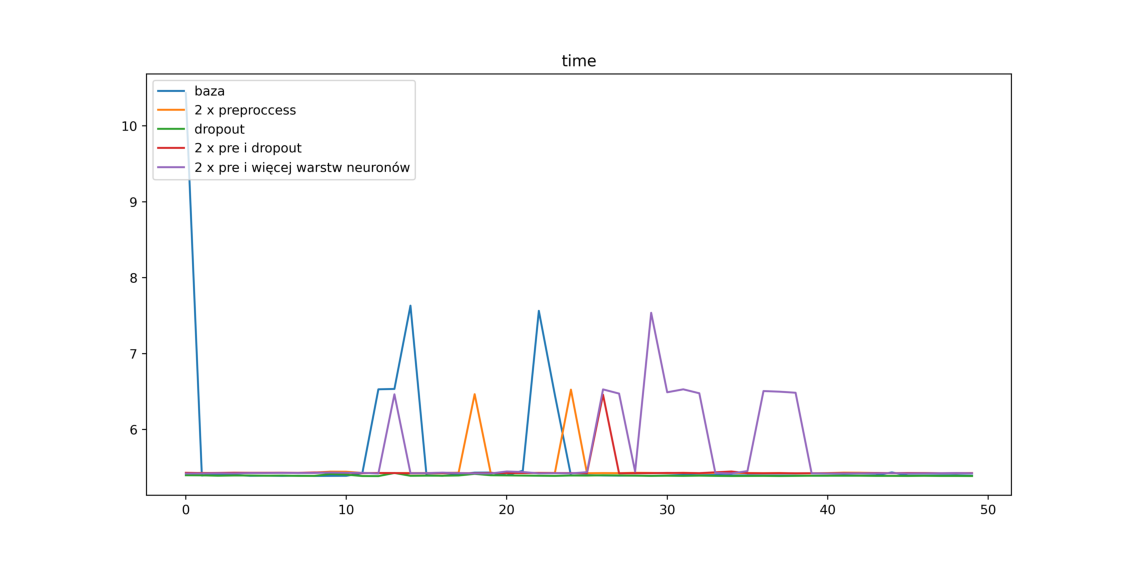

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(Image.open('/content/Test_plots_time.png'))
plt.axis("off")

(-0.5, 4799.5, 2399.5, -0.5)

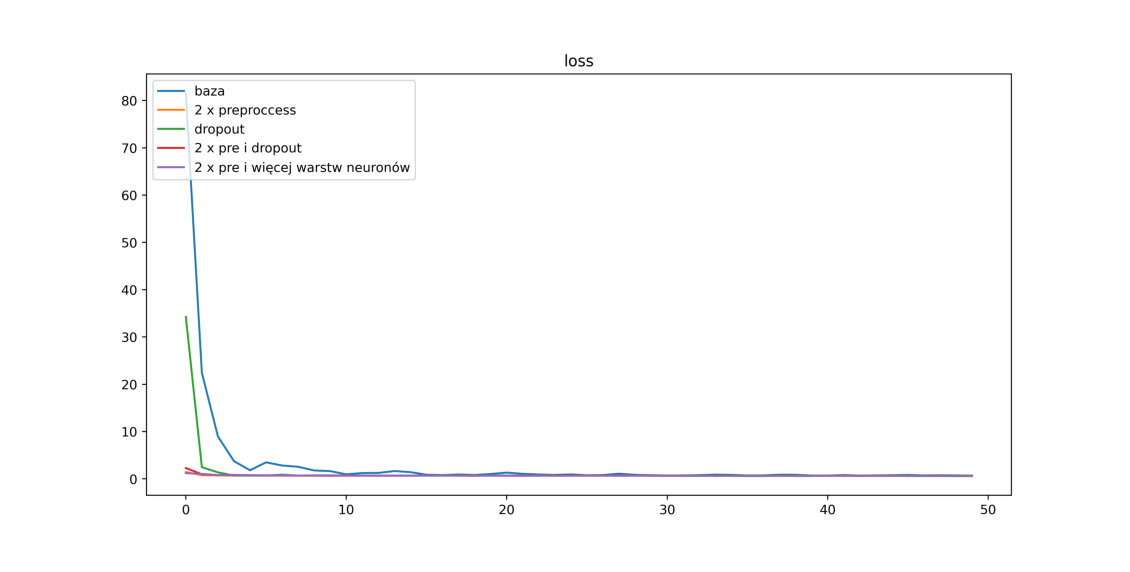

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(Image.open('/content/Test_plots_loss.png'))
plt.axis("off")

(-0.5, 4799.5, 2399.5, -0.5)

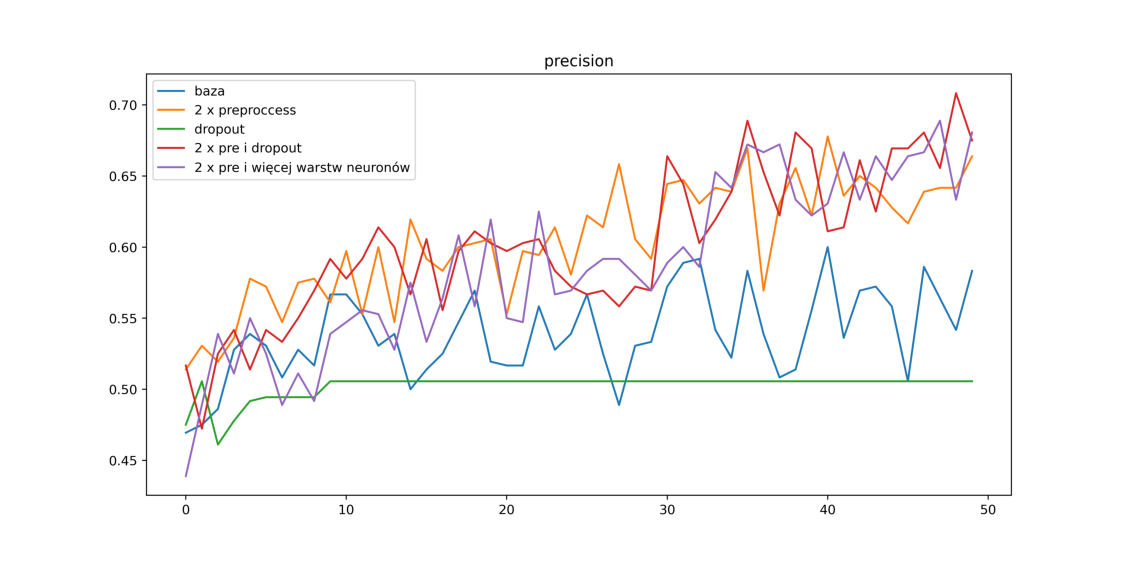

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(Image.open('/content/Test_plots_precision.png'))
plt.axis("off")

Teraz tworzymy dwa modele na podstawie najlepeiej sprawujących się dotychczas modeli i porównujemy je dla trzech róznych solverów.

Solvery te to "Adam", "SGD" oraz "RMSprop". Rozważane modele to:
1. 2 x pre i 2 x WN - czyli jest to sieć składająca się z dwóch modułów "pre", oraz 2 wartsw neuronów z wykluczonymi $15\%$ połączeń do poprzedniej warstwy;
1. 2 x pre i 3 x WN - czyli jest to sieć składająca się z dwóch modułów "pre", oraz 3 wartsw neuronów z wykluczonymi $15\%$ połączeń do poprzedniej warstwy.

(-0.5, 4799.5, 2399.5, -0.5)

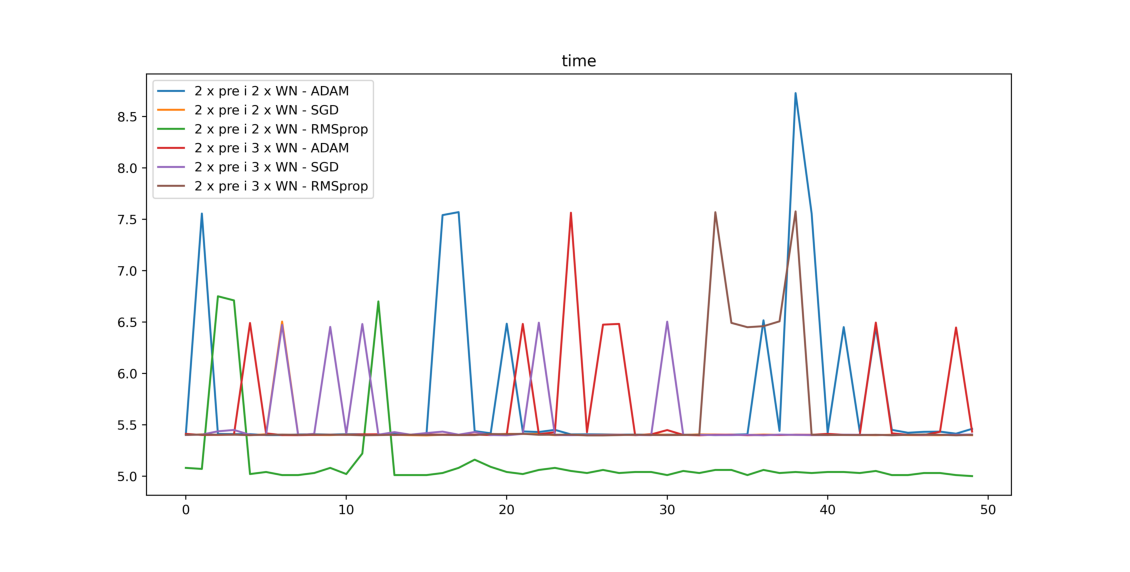

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(Image.open('/content/Best_plots_time.png'))
plt.axis("off")

(-0.5, 4799.5, 2399.5, -0.5)

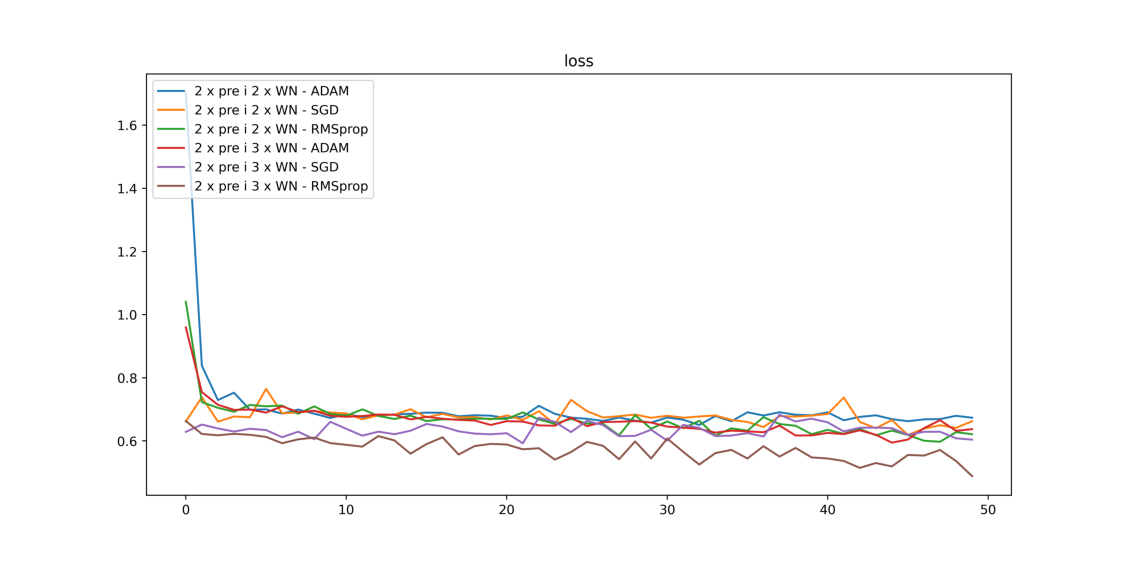

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(Image.open('/content/Best_plots_loss.png'))
plt.axis("off")

(-0.5, 4799.5, 2399.5, -0.5)

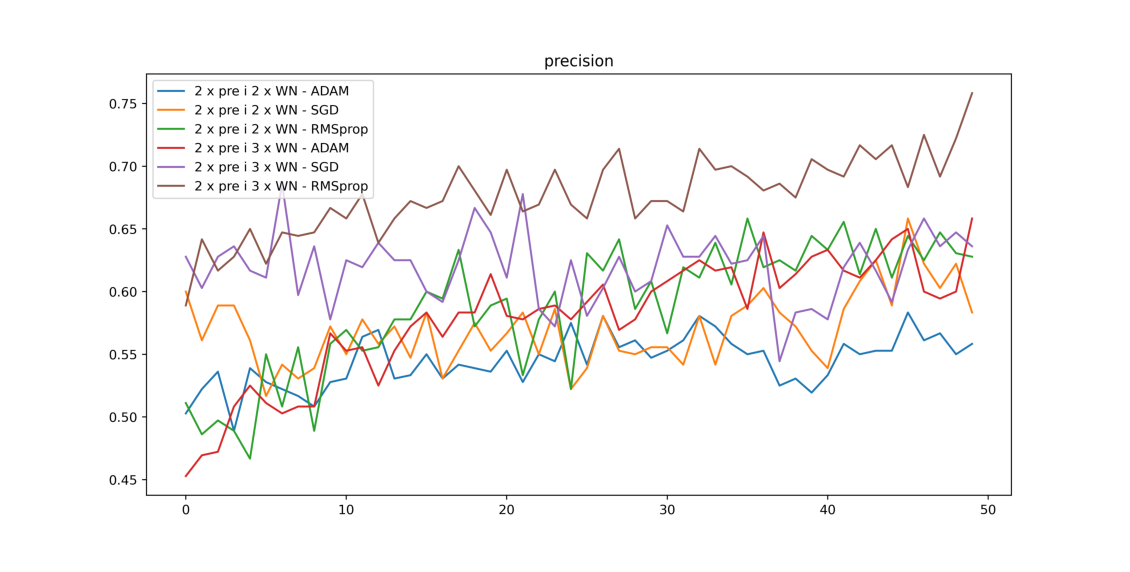

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(Image.open('/content/Best_plots_precision.png'))
plt.axis("off")

Mimo, że najlepszy na zbiorze uczącym wydaje się model "2 x pre i 3 x WN - RMSprop", to największą precyzję na zbiorze testowym osiągnął model "2 x pre i 2 x WN - RMSprop". Wyniki te dla tych modeli wyglądają nastepująco. Precyzja na zbiorze testowym dla modelu:
1. "2 x pre i 2 x WN - ADAM" to $50.00\%$;
1. "2 x pre i 2 x WN - SGD" to $56.67\%$;
1. "2 x pre i 2 x WN - RMSprop" to $58.89\%$;
1. "2 x pre i 3 x WN - ADAM" to $44.44\%$;
1. "2 x pre i 3 x WN - SGD" to $48.89\%$;
1. "2 x pre i 3 x WN - RMSprop" to $53.33\%$.

Dla uwzględnienia uwagi, żadne z modeli "testowych" (poza dwoma najlepszymi) nie uzyskało tak wysokich wyników dla klasyfikacji zbioru testowego.</n>

Ponadto czas działania "2 x pre i 2 x WN - RMSprop" jest również wyższy od wszystkich rozważanych tutaj modeli.

# Wnioski

Bazowy model jest zbyt prosty dla tego problemu, dlatego wynik jego działania to $50\%$ precyzji na zbiorze testowym.

Największa precyzja została osiągnięta przez model z dwiema warstwami konowlucji i poolingu oraz model z pojedynczą wartwą neutronów z $10\%$ połączeń wyłączonych.

# Listing programu

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from google.colab import drive
from zipfile import ZipFile
import random as rd
import numpy as np
import os
from PIL import Image

In [ ]:
rd.seed(9704)
tf.config.run_functions_eagerly(True)
drive.mount('/content/drive')

Mounted at /content/drive


### Rozpakowywanie plików .zip

## Załadowanie zdjęć .jpg do środowiska

In [ ]:
# directory = '/content/drive/MyDrive/Programowanie/DeepLearning/Zadanie_1-Rozpoznawanie_twarzy'

In [ ]:
! cat '/content/drive/MyDrive/Programowanie/DeepLearning/Zadanie_1-Rozpoznawanie_twarzy/REAL.zip.001' '/content/drive/MyDrive/Programowanie/DeepLearning/Zadanie_1-Rozpoznawanie_twarzy/REAL.zip.002' > '/content/drive/MyDrive/Programowanie/DeepLearning/Zadanie_1-Rozpoznawanie_twarzy/Real.zip'

In [ ]:
! unzip '/content/drive/MyDrive/Programowanie/DeepLearning/Zadanie_1-Rozpoznawanie_twarzy/Easy.zip' -d '/content/Easy'
! unzip '/content/drive/MyDrive/Programowanie/DeepLearning/Zadanie_1-Rozpoznawanie_twarzy/Medium.zip' -d '/content/Medium'
! unzip '/content/drive/MyDrive/Programowanie/DeepLearning/Zadanie_1-Rozpoznawanie_twarzy/Hard.zip' -d '/content/Hard'
! unzip '/content/drive/MyDrive/Programowanie/DeepLearning/Zadanie_1-Rozpoznawanie_twarzy/Real.zip' -d '/content/Real'

### Zapisujemy zdjęcia w postaci array'i do zmiennych

In [ ]:
difficulties = ['Easy', 'Medium', 'Hard', 'Real']

In [ ]:
images = {'Easy': [], 'Medium': [], 'Hard': [], 'Real': []}

In [ ]:
for difficulty in difficulties:
  for filename in os.listdir(difficulty):
    images[difficulty].append(Image.open(f'/content/{difficulty}/{filename}'))

## Wyświetlamy obrazki z różnych zbiorów

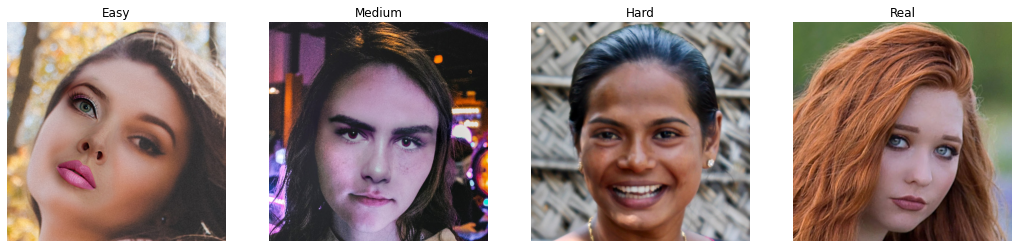

In [ ]:
plt.figure(figsize=(18, 18))
i = 1
for diff in difficulties:
  ax = plt.subplot(1, 4, i)
  plt.imshow(images[diff][0])
  plt.title(diff)
  plt.axis("off")
  i += 1

## Tworzymy zbiory danych do uczenia i testowania

In [ ]:
batch_size = 32
img_height = 600
img_width = 600

### Zamieniamy zdjęcia na wartości liczbowe

In [ ]:
images_n = images.copy()

In [ ]:
for diff in difficulties:
  for i in range(len(images[diff])):
    images_n[diff][i] = np.asarray(images[diff][i])

In [ ]:
easy = np.array(images_n['Easy'])
medium = np.array(images_n['Medium'])
hard = np.array(images_n['Hard'])
real = np.array(images_n['Real'])

### Wybieramy poziom trudności zbioru i tworzymy zbiory data oraz labels

In [ ]:
poziom = easy
length = len(poziom)

In [ ]:
data = np.vstack((poziom, real[:length]))
labels = np.transpose(np.hstack((np.zeros((1, length)), np.ones((1, length)))))

### Tworzymy zbiór uczący i testowy

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
# trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, random_state=997)
trainX, testX, trainY, testY = train_test_split(data, to_categorical(labels), test_size=0.2, random_state=123)

In [ ]:
trainX.shape

(360, 600, 600, 3)

In [ ]:
testX.shape

(90, 600, 600, 3)

In [ ]:
trainY.shape

(360, 2)

In [ ]:
testY.shape

(90, 2)

In [ ]:
filepath = '/content/drive/MyDrive/Programowanie/DeepLearning/Zadanie_1-Rozpoznawanie_twarzy/EasySGD/'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

## Tworzymy model/-e

### Model bazowy

In [ ]:
base_model = keras.models.Sequential([
    layers.Input(shape=(600, 600, 3)),
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.SeparableConv2D(
        filters = 2,
        kernel_size=3, 
        padding="valid"),
    layers.MaxPool2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(200, activation = 'relu'),
    layers.Dense(2, activation = 'sigmoid')
    ]
    )

In [ ]:
base_model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
%timeit
base_model.fit(trainX, trainY, epochs = 50, batch_size = 32)

In [ ]:
base_model.evaluate(testX, testY)

### Modele testowe

In [ ]:
model_1 = keras.models.Sequential([
    layers.Input(shape=(600, 600, 3)),
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    # pierwszy pre
    ## dwie konwolucje
    layers.SeparableConv2D(
        filters = 3,
        kernel_size=3, 
        padding="valid"),    
    # layers.SeparableConv2D(
    #     filters = 2,
    #     kernel_size=3, 
    #     padding="valid"),
    # #pool
    layers.MaxPool2D(pool_size = 3),
    # drugi pre
    # jedna konwolucja
    layers.SeparableConv2D(
        filters = 2,
        kernel_size=3, 
        padding="valid"),
    # jeden pool
    layers.MaxPool2D(pool_size = 2),
    # spłaszczanie
    layers.Flatten(),
    # warstwy neuronowe
    #pierwsza
    layers.Dense(100, activation = 'relu'),
    layers.Dropout(0.15),
    # druga
    layers.Dense(150, activation = 'relu'),
    layers.Dropout(0.15),
    # trzecia
    # layers.Dense(100, activation = 'relu'),
    # layers.Dropout(0.15),
    # wyjściowa
    layers.Dense(2, activation = 'sigmoid')
    ]
    )

In [ ]:
model_1.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
%timeit
model_1.fit(trainX, trainY, epochs = 50, batch_size = 32)

Epoch 1/50
12/12 [==============================] - 5s 405ms/step - loss: 1.7015 - accuracy: 0.5028
Epoch 2/50
12/12 [==============================] - 7s 555ms/step - loss: 0.8382 - accuracy: 0.5222
Epoch 3/50
12/12 [==============================] - 5s 410ms/step - loss: 0.7295 - accuracy: 0.5361
Epoch 4/50
12/12 [==============================] - 5s 409ms/step - loss: 0.7528 - accuracy: 0.4889
Epoch 5/50
12/12 [==============================] - 5s 408ms/step - loss: 0.6988 - accuracy: 0.5389
Epoch 6/50
12/12 [==============================] - 5s 399ms/step - loss: 0.7000 - accuracy: 0.5278
Epoch 7/50
12/12 [==============================] - 5s 399ms/step - loss: 0.6866 - accuracy: 0.5222
Epoch 8/50
12/12 [==============================] - 5s 405ms/step - loss: 0.6995 - accuracy: 0.5167
Epoch 9/50
12/12 [==============================] - 5s 407ms/step - loss: 0.6864 - accuracy: 0.5083
Epoch 10/50
12/12 [==============================] - 5s 404ms/step - loss: 0.6728 - accuracy: 0.5278

In [ ]:
model_1.evaluate(testX, testY)

3/3 [==============================] - 0s 33ms/step - loss: 0.7208 - accuracy: 0.5000


[0.7208308577537537, 0.5]

In [ ]:
model_1.compile(optimizer = keras.optimizers.SGD(learning_rate=0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
%timeit
model_1.fit(trainX, trainY, epochs = 50, batch_size = 32)

In [ ]:
model_1.evaluate(testX, testY)

In [ ]:
model_1.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
%timeit
model_1.fit(trainX, trainY, epochs = 50, batch_size = 32)

Epoch 1/50
12/12 [==============================] - 5s 408ms/step - loss: 1.0408 - accuracy: 0.5111
Epoch 2/50
12/12 [==============================] - 5s 407ms/step - loss: 0.7230 - accuracy: 0.4861
Epoch 3/50
12/12 [==============================] - 6s 475ms/step - loss: 0.7050 - accuracy: 0.4972
Epoch 4/50
12/12 [==============================] - 6s 471ms/step - loss: 0.6924 - accuracy: 0.4889
Epoch 5/50
12/12 [==============================] - 5s 402ms/step - loss: 0.7141 - accuracy: 0.4667
Epoch 6/50
12/12 [==============================] - 5s 404ms/step - loss: 0.7097 - accuracy: 0.5500
Epoch 7/50
12/12 [==============================] - 5s 401ms/step - loss: 0.7121 - accuracy: 0.5083
Epoch 8/50
12/12 [==============================] - 5s 401ms/step - loss: 0.6862 - accuracy: 0.5556
Epoch 9/50
12/12 [==============================] - 5s 403ms/step - loss: 0.7095 - accuracy: 0.4889
Epoch 10/50
12/12 [==============================] - 5s 408ms/step - loss: 0.6856 - accuracy: 0.5583

In [ ]:
model_1.evaluate(testX, testY)

3/3 [==============================] - 0s 39ms/step - loss: 0.6904 - accuracy: 0.5889


[0.6904160976409912, 0.5888888835906982]

In [ ]:
# model_1.save(filepath)

In [ ]:
model_2 = keras.models.Sequential([
    layers.Input(shape=(600, 600, 3)),
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    # pierwszy pre
    ## jedna konwolucja
    layers.SeparableConv2D(
        filters = 3,
        kernel_size=3, 
        padding="valid"),    
    ## pool
    layers.MaxPool2D(pool_size = 3),
    # drugi pre
    ## jedna konwolucja
    layers.SeparableConv2D(
        filters = 2,
        kernel_size=3, 
        padding="valid"),
    ## jeden pool
    layers.MaxPool2D(pool_size = 2),
    # spłaszczanie
    layers.Flatten(),
    # warstwy neuronowe
    ## pierwsza
    layers.Dense(100, activation = 'relu'),
    layers.Dropout(0.15),
    ## druga
    layers.Dense(150, activation = 'relu'),
    layers.Dropout(0.15),
    ## trzecia
    layers.Dense(100, activation = 'relu'),
    layers.Dropout(0.15),
    # wyjściowa
    layers.Dense(2, activation = 'sigmoid')
    ]
    )

In [ ]:
model_2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
model_2.fit(trainX, trainY, epochs = 50, batch_size = 32)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/50
12/12 [==============================] - 5s 411ms/step - loss: 0.9596 - accuracy: 0.4528
Epoch 2/50
12/12 [==============================] - 5s 400ms/step - loss: 0.7547 - accuracy: 0.4694
Epoch 3/50
12/12 [==============================] - 5s 401ms/step - loss: 0.7145 - accuracy: 0.4722
Epoch 4/50
12/12 [==============================] - 5s 403ms/step - loss: 0.6984 - accuracy: 0.5083
Epoch 5/50
12/12 [==============================] - 6s 490ms/step - loss: 0.6994 - accuracy: 0.5250
Epoch 6/50
12/12 [==============================] - 5s 416ms/step - loss: 0.6897 - accuracy: 0.5111
Epoch 7/50
12/12 [==============================] - 5s 399ms/step - loss: 0.7098 - accuracy: 0.5028
Epoch 8/50
12/12 [==============================] - 5s 398ms/step - loss: 0.6912 - accuracy: 0.5083
Epoch 9/50
12/12 [==============================] - 5s 401ms/step - loss: 0.6958 - accuracy: 0.5083
Epoch 10/50
12/12 [==============================] - 5s 403ms/step - loss: 0.6797 - accuracy: 0.5667

In [ ]:
model_2.evaluate(testX, testY)

3/3 [==============================] - 0s 31ms/step - loss: 0.7504 - accuracy: 0.4444


[0.7503863573074341, 0.4444444477558136]

In [ ]:
model_2.compile(optimizer = keras.optimizers.SGD(learning_rate=0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
model_2.fit(trainX, trainY, epochs = 50, batch_size = 32)

Epoch 1/50
12/12 [==============================] - 5s 400ms/step - loss: 0.6287 - accuracy: 0.6278
Epoch 2/50
12/12 [==============================] - 5s 404ms/step - loss: 0.6520 - accuracy: 0.6028
Epoch 3/50
12/12 [==============================] - 5s 436ms/step - loss: 0.6396 - accuracy: 0.6278
Epoch 4/50
12/12 [==============================] - 5s 449ms/step - loss: 0.6298 - accuracy: 0.6361
Epoch 5/50
12/12 [==============================] - 5s 402ms/step - loss: 0.6387 - accuracy: 0.6167
Epoch 6/50
12/12 [==============================] - 5s 400ms/step - loss: 0.6345 - accuracy: 0.6111
Epoch 7/50
12/12 [==============================] - 6s 472ms/step - loss: 0.6119 - accuracy: 0.6861
Epoch 8/50
12/12 [==============================] - 5s 400ms/step - loss: 0.6294 - accuracy: 0.5972
Epoch 9/50
12/12 [==============================] - 5s 411ms/step - loss: 0.6056 - accuracy: 0.6361
Epoch 10/50
12/12 [==============================] - 6s 452ms/step - loss: 0.6607 - accuracy: 0.5778

In [ ]:
model_2.evaluate(testX, testY)

3/3 [==============================] - 0s 37ms/step - loss: 0.8163 - accuracy: 0.4889


[0.816265881061554, 0.4888888895511627]

In [ ]:
model_2.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
model_2.fit(trainX, trainY, epochs = 50, batch_size = 32)

In [ ]:
model_2.evaluate(testX, testY)

3/3 [==============================] - 0s 32ms/step - loss: 1.1969 - accuracy: 0.5333


[1.196934461593628, 0.5333333611488342]

## Kod do wykresów

### Macierze danych testy



In [ ]:
baza = np.array([[10.431, 81.5598, 0.4694],
[5.394, 22.4229, 0.4750],
[5.411, 8.9759, 0.4861],
[5.402, 3.7397, 0.5278],
[5.391, 1.8160, 0.5389],
[5.392, 3.4825, 0.5306],
[5.390, 2.8225, 0.5083],
[5.392, 2.5476, 0.5278],
[5.389, 1.7744, 0.5167],
[5.390, 1.6294, 0.5667],
[5.391, 0.9505, 0.5667],
[5.425, 1.2203, 0.5528],
[6.530, 1.2506, 0.5306],
[6.535, 1.6449, 0.5389],
[7.632, 1.4147, 0.5000],
[5.397, 0.8662, 0.5139],
[5.391, 0.7880, 0.5250],
[5.410, 0.9192, 0.5472],
[5.433, 0.8219, 0.5694],
[5.434, 1.0268, 0.5194],
[5.397, 1.3165, 0.5167],
[5.458, 1.0555, 0.5167],
[7.564, 0.9236, 0.5583],
[6.455, 0.8257, 0.5278],
[5.395, 0.9457, 0.5389],
[5.399, 0.7519, 0.5667],
[5.395, 0.7965, 0.5250],
[5.393, 1.0931, 0.4889],
[5.394, 0.8405, 0.5306],
[5.391, 0.7740, 0.5333],
[5.395, 0.7060, 0.5722],
[5.403, 0.7233, 0.5889],
[5.398, 0.7790, 0.5917],
[5.402, 0.8873, 0.5417],
[5.397, 0.8407, 0.5222],
[5.397, 0.7084, 0.5833],
[5.395, 0.7313, 0.5389],
[5.395, 0.8684, 0.5083],
[5.394, 0.8623, 0.5139],
[5.392, 0.6999, 0.5556],
[5.392, 0.6908, 0.6000],
[5.397, 0.7940, 0.5361],
[5.394, 0.6820, 0.5694],
[5.396, 0.7236, 0.5722],
[5.436, 0.7577, 0.5583],
[5.394, 0.8295, 0.5056],
[5.395, 0.7222, 0.5861],
[5.396, 0.7526, 0.5639],
[5.398, 0.7290, 0.5417],
[5.393, 0.6840, 0.5833]])
dwa_x_pre = np.array([[5.426, 1.4404, 0.5139],
[5.429, 0.7646, 0.5306],
[5.427, 0.7376, 0.5194],
[5.429, 0.7023, 0.5361],
[5.430, 0.6873, 0.5778],
[5.431, 0.6783, 0.5722],
[5.431, 0.6822, 0.5472],
[5.429, 0.6826, 0.5750],
[5.432, 0.6809, 0.5778],
[5.446, 0.6765, 0.5611],
[5.445, 0.6564, 0.5972],
[5.429, 0.6753, 0.5528],
[5.427, 0.6562, 0.6000],
[5.427, 0.6856, 0.5472],
[5.428, 0.6545, 0.6194],
[5.428, 0.6721, 0.5917],
[5.431, 0.6778, 0.5833],
[5.432, 0.6712, 0.6000],
[6.466, 0.6632, 0.6028],
[5.428, 0.6739, 0.6056],
[5.430, 0.6897, 0.5528],
[5.429, 0.6767, 0.5972],
[5.430, 0.6568, 0.5944],
[5.429, 0.6489, 0.6139],
[6.526, 0.6738, 0.5806],
[5.425, 0.6461, 0.6222],
[5.427, 0.6514, 0.6139],
[5.426, 0.6253, 0.6583],
[5.431, 0.6570, 0.6056],
[5.429, 0.6540, 0.5917],
[5.426, 0.6203, 0.6444],
[5.431, 0.6295, 0.6472],
[5.425, 0.6401, 0.6306],
[5.430, 0.6300, 0.6417],
[5.427, 0.6262, 0.6389],
[5.428, 0.6388, 0.6694],
[5.426, 0.6830, 0.5694],
[5.428, 0.6306, 0.6306],
[5.423, 0.6282, 0.6556],
[5.424, 0.6344, 0.6222],
[5.427, 0.6139, 0.6778],
[5.433, 0.6133, 0.6361],
[5.432, 0.6302, 0.6500],
[5.428, 0.6198, 0.6417],
[5.425, 0.6298, 0.6278],
[5.425, 0.6302, 0.6167],
[5.428, 0.6142, 0.6389],
[5.426, 0.6404, 0.6417],
[5.425, 0.6129, 0.6417],
[5.426, 0.6004, 0.6639]])
dropout = np.array([[5.398, 34.2524, 0.4750],
[5.397, 2.4616, 0.5056],
[5.392, 1.3694, 0.4611],
[5.395, 0.7031, 0.4778],
[5.395, 0.6933, 0.4917],
[5.392, 0.6932, 0.4944],
[5.394, 0.8861, 0.4944],
[5.390, 0.6932, 0.4944],
[5.390, 0.6932, 0.4944],
[5.414, 0.6931, 0.5056],
[5.406, 0.6931, 0.5056],
[5.388, 0.6931, 0.5056],
[5.387, 0.6931, 0.5056],
[5.428, 0.6931, 0.5056],
[5.391, 0.6931, 0.5056],
[5.393, 0.6931, 0.5056],
[5.392, 0.6931, 0.5056],
[5.395, 0.6931, 0.5056],
[5.416, 0.6931, 0.5056],
[5.398, 0.6931, 0.5056],
[5.396, 0.6932, 0.5056],
[5.394, 0.6931, 0.5056],
[5.392, 0.6931, 0.5056],
[5.390, 0.6931, 0.5056],
[5.395, 0.6931, 0.5056],
[5.394, 0.6931, 0.5056],
[5.398, 0.6931, 0.5056],
[5.396, 0.6931, 0.5056],
[5.393, 0.6932, 0.5056],
[5.390, 0.6931, 0.5056],
[5.392, 0.6931, 0.5056],
[5.390, 0.6931, 0.5056],
[5.393, 0.6931, 0.5056],
[5.390, 0.6931, 0.5056],
[5.388, 0.6931, 0.5056],
[5.389, 0.6931, 0.5056],
[5.390, 0.6931, 0.5056],
[5.388, 0.6931, 0.5056],
[5.390, 0.6931, 0.5056],
[5.392, 0.6931, 0.5056],
[5.392, 0.6931, 0.5056],
[5.392, 0.6931, 0.5056],
[5.392, 0.6931, 0.5056],
[5.390, 0.6931, 0.5056],
[5.390, 0.6931, 0.5056],
[5.389, 0.6931, 0.5056],
[5.391, 0.6931, 0.5056],
[5.389, 0.6931, 0.5056],
[5.389, 0.6931, 0.5056],
[5.388, 0.6931, 0.5056]])
dwa_x_pre_i_drop = np.array([[5.431, 2.2808, 0.5167],
[5.427, 0.9740, 0.4722],
[5.429, 0.7466, 0.5250],
[5.432, 0.7647, 0.5417],
[5.431, 0.7820, 0.5139],
[5.431, 0.7265, 0.5417],
[5.432, 0.7092, 0.5333],
[5.430, 0.6845, 0.5500],
[5.435, 0.6721, 0.5694],
[5.435, 0.6704, 0.5917],
[5.430, 0.6837, 0.5778],
[5.425, 0.6620, 0.5917],
[5.428, 0.6511, 0.6139],
[5.427, 0.6552, 0.6000],
[5.423, 0.6626, 0.5667],
[5.424, 0.6718, 0.6056],
[5.425, 0.6735, 0.5556],
[5.427, 0.6605, 0.5972],
[5.425, 0.6441, 0.6111],
[5.428, 0.6535, 0.6028],
[5.427, 0.6562, 0.5972],
[5.427, 0.6416, 0.6028],
[5.428, 0.6565, 0.6056],
[5.427, 0.6988, 0.5833],
[5.427, 0.6892, 0.5722],
[5.425, 0.6745, 0.5667],
[6.459, 0.6923, 0.5694],
[5.424, 0.6843, 0.5583],
[5.425, 0.6783, 0.5722],
[5.426, 0.6466, 0.5694],
[5.429, 0.6306, 0.6639],
[5.428, 0.6228, 0.6444],
[5.426, 0.6422, 0.6028],
[5.437, 0.6364, 0.6194],
[5.448, 0.6181, 0.6389],
[5.425, 0.5954, 0.6889],
[5.424, 0.6044, 0.6528],
[5.425, 0.6515, 0.6222],
[5.424, 0.5984, 0.6806],
[5.425, 0.6044, 0.6694],
[5.424, 0.6498, 0.6111],
[5.426, 0.6390, 0.6139],
[5.424, 0.6031, 0.6611],
[5.428, 0.6237, 0.6250],
[5.426, 0.6198, 0.6694],
[5.428, 0.6042, 0.6694],
[5.427, 0.6109, 0.6806],
[5.425, 0.6173, 0.6556],
[5.427, 0.5772, 0.7083],
[5.427, 0.5904, 0.6750]])
konwolucje = np.array([[7.577, 0.7846, 0.4833],
[7.572, 0.7039, 0.5139],
[7.586, 0.6892, 0.5306],
[8.663, 0.6836, 0.5389],
[7.575, 0.6906, 0.5306],
[7.591, 0.6780, 0.5694],
[7.577, 0.6629, 0.6278],
[7.576, 0.6723, 0.5750],
[7.577, 0.6721, 0.5806],
[8.680, 0.6634, 0.6111],
[7.605, 0.6755, 0.5639],
[7.596, 0.6599, 0.5722],
[9.691, 0.6554, 0.5778],
[8.639, 0.6384, 0.6389],
[7.589, 0.6676, 0.5750],
[7.597, 0.6704, 0.5944],
[8.627, 0.6571, 0.6361],
[7.581, 0.6491, 0.6167],
[7.581, 0.6479, 0.6444],
[8.665, 0.6578, 0.5750],
[7.576, 0.6453, 0.5972],
[7.575, 0.6367, 0.6250],
[9.791, 0.6536, 0.6194],
[7.578, 0.6184, 0.6528],
[7.576, 0.6334, 0.6333],
[7.576, 0.6262, 0.6500],
[7.606, 0.6295, 0.6194],
[7.576, 0.6416, 0.6111],
[7.577, 0.6246, 0.6500],
[7.599, 0.6257, 0.6500],
[9.760, 0.6411, 0.6250],
[7.603, 0.6002, 0.6833],
[8.645, 0.6023, 0.6583],
[7.577, 0.6169, 0.6472],
[8.644, 0.6093, 0.6611],
[7.576, 0.6231, 0.6361],
[8.676, 0.5982, 0.6444],
[8.696, 0.6077, 0.6694],
[7.597, 0.5988, 0.6444],
[7.575, 0.6298, 0.6139],
[7.575, 0.6089, 0.6639],
[7.571, 0.6031, 0.6861],
[7.572, 0.5795, 0.6806],
[7.572, 0.5780, 0.7028],
[8.663, 0.5787, 0.7056],
[8.670, 0.6040, 0.6639],
[8.652, 0.5863, 0.6833],
[8.649, 0.5944, 0.6361],
[8.689, 0.5597, 0.7278],
[7.609, 0.5626, 0.7389]])
dwaXpre_i_dwaXneur_i_drop = np.array([[5.421, 1.2022, 0.4389],
[5.422, 1.0447, 0.4889],
[5.424, 0.8013, 0.5389],
[5.423, 0.8446, 0.5111],
[5.427, 0.7574, 0.5500],
[5.427, 0.7542, 0.5250],
[5.429, 0.7539, 0.4889],
[5.428, 0.7037, 0.5111],
[5.428, 0.7371, 0.4917],
[5.434, 0.7414, 0.5389],
[5.431, 0.7164, 0.5472],
[5.430, 0.6886, 0.5556],
[5.421, 0.6821, 0.5528],
[6.464, 0.6982, 0.5278],
[5.426, 0.6972, 0.5750],
[5.426, 0.6848, 0.5333],
[5.433, 0.6743, 0.5639],
[5.426, 0.6658, 0.6083],
[5.422, 0.7098, 0.5583],
[5.422, 0.6634, 0.6194],
[5.448, 0.6844, 0.5500],
[5.441, 0.6997, 0.5472],
[5.423, 0.6680, 0.6250],
[5.425, 0.6493, 0.5667],
[5.423, 0.6415, 0.5694],
[5.439, 0.6605, 0.5833],
[6.529, 0.6551, 0.5917],
[6.474, 0.6600, 0.5917],
[5.447, 0.6811, 0.5806],
[7.538, 0.6709, 0.5694],
[6.491, 0.6440, 0.5889],
[6.530, 0.6429, 0.6000],
[6.478, 0.6237, 0.5861],
[5.428, 0.6129, 0.6528],
[5.423, 0.6223, 0.6417],
[5.453, 0.6049, 0.6722],
[6.507, 0.6000, 0.6667],
[6.499, 0.6125, 0.6722],
[6.485, 0.6218, 0.6333],
[5.423, 0.6214, 0.6222],
[5.421, 0.6355, 0.6306],
[5.422, 0.6267, 0.6667],
[5.424, 0.6318, 0.6333],
[5.423, 0.6003, 0.6639],
[5.425, 0.6201, 0.6472],
[5.422, 0.6003, 0.6639],
[5.424, 0.5942, 0.6667],
[5.425, 0.5804, 0.6889],
[5.427, 0.6097, 0.6333],
[5.424, 0.5869, 0.6806]])

### Wykresy testowe

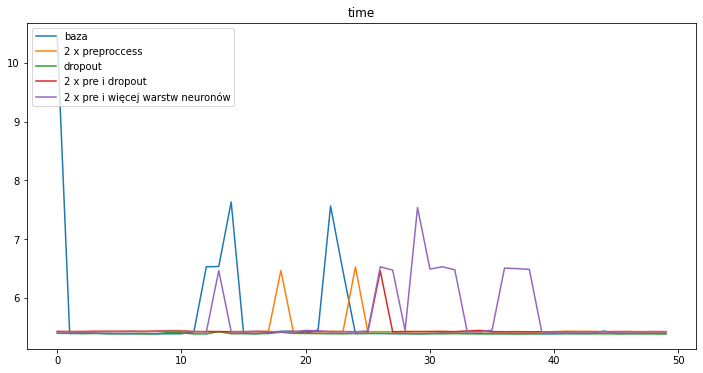

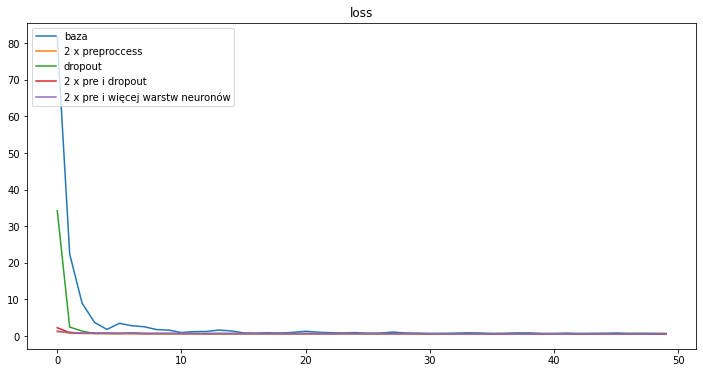

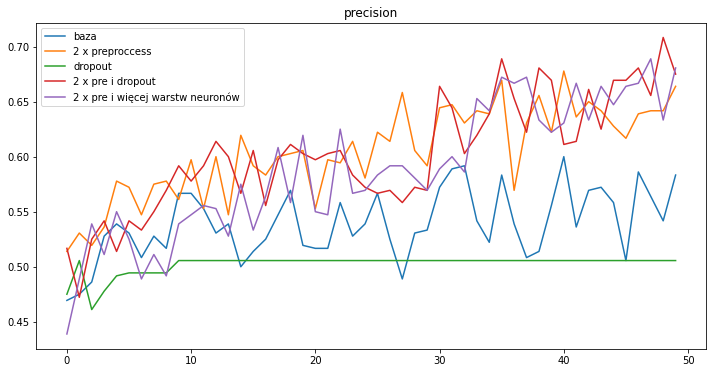

In [ ]:
titles = ['time', 'loss', 'precision']
for i in range(3):
  plt.figure(figsize=(12, 6))
  plt.plot(baza[:, i], label="baza")
  plt.plot(dwa_x_pre[:, i], label="2 x pre")
  plt.plot(dropout[:, i], label="dropout")
  plt.plot(dwa_x_pre_i_drop[:, i], label="2 x pre i dropout")
  plt.plot(dwaXpre_i_dwaXneur_i_drop[:, i], label="2 x pre i więcej warstw neuronów")
  plt.title(titles[i])
  plt.legend(loc="upper left")
  plt.savefig(f"Test_plots_{titles[i]}.png", dpi=400)
  plt.show()

### Dane najlepsze

In [ ]:
dwa_neuronowe_ADAM = np.array([[5.405, 1.7015, 0.5028],
[7.555, 0.8382, 0.5222],
[5.410, 0.7295, 0.5361],
[5.409, 0.7528, 0.4889],
[5.408, 0.6988, 0.5389],
[5.399, 0.7000, 0.5278],
[5.399, 0.6866, 0.5222],
[5.405, 0.6995, 0.5167],
[5.407, 0.6864, 0.5083],
[5.404, 0.6728, 0.5278],
[5.408, 0.6853, 0.5306],
[5.407, 0.6758, 0.5639],
[5.404, 0.6800, 0.5694],
[5.415, 0.6842, 0.5306],
[5.403, 0.6860, 0.5333],
[5.413, 0.6898, 0.5500],
[7.540, 0.6893, 0.5306],
[7.569, 0.6781, 0.5417],
[5.438, 0.6815, 0.5389],
[5.417, 0.6801, 0.5361],
[6.483, 0.6723, 0.5528],
[5.435, 0.6768, 0.5278],
[5.429, 0.7113, 0.5500],
[5.450, 0.6858, 0.5444],
[5.406, 0.6740, 0.5750],
[5.407, 0.6701, 0.5417],
[5.406, 0.6635, 0.5806],
[5.404, 0.6742, 0.5556],
[5.404, 0.6643, 0.5611],
[5.403, 0.6582, 0.5472],
[5.404, 0.6743, 0.5528],
[5.403, 0.6672, 0.5611],
[5.403, 0.6507, 0.5806],
[5.399, 0.6788, 0.5722],
[5.403, 0.6624, 0.5583],
[5.407, 0.6907, 0.5500],
[6.516, 0.6806, 0.5528],
[5.440, 0.6908, 0.5250],
[8.727, 0.6830, 0.5306],
[7.556, 0.6813, 0.5194],
[5.421, 0.6906, 0.5333],
[6.450, 0.6655, 0.5583],
[5.433, 0.6761, 0.5500],
[6.450, 0.6812, 0.5528],
[5.450, 0.6691, 0.5528],
[5.422, 0.6626, 0.5833],
[5.431, 0.6684, 0.5611],
[5.433, 0.6693, 0.5667],
[5.413, 0.6796, 0.5500],
[5.460, 0.6736, 0.5583]])
dwa_neuronowe_SGD = np.array([[5.400, 0.6616, 0.6000],
[5.406, 0.7385, 0.5611],
[5.401, 0.6611, 0.5889],
[5.404, 0.6775, 0.5889],
[5.398, 0.6752, 0.5611],
[5.407, 0.7649, 0.5167],
[6.504, 0.6876, 0.5417],
[5.402, 0.6902, 0.5306],
[5.400, 0.6949, 0.5389],
[5.399, 0.6902, 0.5722],
[5.404, 0.6870, 0.5500],
[5.402, 0.6685, 0.5778],
[5.404, 0.6814, 0.5583],
[5.402, 0.6833, 0.5722],
[5.398, 0.7005, 0.5472],
[5.396, 0.6749, 0.5833],
[5.402, 0.6859, 0.5306],
[5.401, 0.6748, 0.5528],
[5.401, 0.6754, 0.5750],
[5.406, 0.6679, 0.5528],
[5.411, 0.6808, 0.5667],
[5.410, 0.6669, 0.5833],
[5.411, 0.6942, 0.5500],
[5.398, 0.6528, 0.5861],
[5.402, 0.7301, 0.5222],
[5.400, 0.6944, 0.5389],
[5.402, 0.6743, 0.5806],
[5.404, 0.6784, 0.5528],
[5.398, 0.6836, 0.5500],
[5.408, 0.6733, 0.5556],
[5.402, 0.6798, 0.5556],
[5.401, 0.6737, 0.5417],
[5.406, 0.6775, 0.5806],
[5.404, 0.6809, 0.5417],
[5.400, 0.6666, 0.5806],
[5.401, 0.6602, 0.5889],
[5.404, 0.6443, 0.6028],
[5.402, 0.6786, 0.5833],
[5.401, 0.6772, 0.5722],
[5.399, 0.6802, 0.5528],
[5.401, 0.6854, 0.5389],
[5.401, 0.7373, 0.5861],
[5.400, 0.6605, 0.6083],
[5.398, 0.6401, 0.6250],
[5.403, 0.6662, 0.5889],
[5.399, 0.6190, 0.6583],
[5.398, 0.6390, 0.6222],
[5.398, 0.6497, 0.6028],
[5.402, 0.6414, 0.6222],
[5.398, 0.6626, 0.5833]])
dwa_neuronowe_RMSprop = np.array([[5.08, 1.0408, 0.5111],
[5.07, 0.7230, 0.4861],
[6.75, 0.7050, 0.4972],
[6.71, 0.6924, 0.4889],
[5.02, 0.7141, 0.4667],
[5.04, 0.7097, 0.5500],
[5.01, 0.7121, 0.5083],
[5.01, 0.6862, 0.5556],
[5.03, 0.7095, 0.4889],
[5.08, 0.6856, 0.5583],
[5.02, 0.6798, 0.5694],
[5.22, 0.7001, 0.5528],
[6.70, 0.6794, 0.5556],
[5.01, 0.6696, 0.5778],
[5.01, 0.6801, 0.5778],
[5.01, 0.6631, 0.6000],
[5.03, 0.6685, 0.5944],
[5.08, 0.6679, 0.6333],
[5.16, 0.6705, 0.5722],
[5.09, 0.6703, 0.5889],
[5.04, 0.6697, 0.5944],
[5.02, 0.6905, 0.5333],
[5.06, 0.6680, 0.5778],
[5.08, 0.6543, 0.6000],
[5.05, 0.6699, 0.5222],
[5.03, 0.6552, 0.6306],
[5.06, 0.6542, 0.6167],
[5.03, 0.6175, 0.6417],
[5.04, 0.6816, 0.5861],
[5.04, 0.6387, 0.6083],
[5.01, 0.6617, 0.5667],
[5.05, 0.6404, 0.6194],
[5.03, 0.6640, 0.6111],
[5.06, 0.6167, 0.6389],
[5.06, 0.6400, 0.6056],
[5.01, 0.6326, 0.6583],
[5.06, 0.6754, 0.6194],
[5.03, 0.6536, 0.6250],
[5.04, 0.6481, 0.6167],
[5.03, 0.6215, 0.6444],
[5.04, 0.6352, 0.6333],
[5.04, 0.6225, 0.6556],
[5.03, 0.6383, 0.6139],
[5.05, 0.6180, 0.6500],
[5.01, 0.6329, 0.6111],
[5.01, 0.6188, 0.6444],
[5.03, 0.6007, 0.6250],
[5.03, 0.5975, 0.6472],
[5.01, 0.6279, 0.6306],
[5.00, 0.6214, 0.6278]])
trzy_neuronowe_ADAM = np.array([[5.411, 0.9596, 0.4528],
[5.400, 0.7547, 0.4694],
[5.401, 0.7145, 0.4722],
[5.403, 0.6984, 0.5083],
[6.490, 0.6994, 0.5250],
[5.416, 0.6897, 0.5111],
[5.399, 0.7098, 0.5028],
[5.398, 0.6912, 0.5083],
[5.401, 0.6958, 0.5083],
[5.403, 0.6797, 0.5667],
[5.401, 0.6765, 0.5528],
[5.406, 0.6789, 0.5556],
[5.407, 0.6837, 0.5250],
[5.400, 0.6829, 0.5528],
[5.404, 0.6682, 0.5722],
[5.404, 0.6765, 0.5833],
[5.404, 0.6704, 0.5639],
[5.401, 0.6668, 0.5833],
[5.404, 0.6647, 0.5833],
[5.399, 0.6507, 0.6139],
[5.405, 0.6626, 0.5806],
[6.481, 0.6614, 0.5778],
[5.408, 0.6493, 0.5861],
[5.427, 0.6483, 0.5889],
[7.563, 0.6743, 0.5778],
[5.427, 0.6468, 0.5917],
[6.474, 0.6599, 0.6056],
[6.481, 0.6609, 0.5694],
[5.398, 0.6628, 0.5778],
[5.406, 0.6582, 0.6000],
[5.448, 0.6454, 0.6083],
[5.401, 0.6422, 0.6167],
[5.397, 0.6383, 0.6250],
[5.403, 0.6265, 0.6167],
[5.403, 0.6326, 0.6194],
[5.398, 0.6304, 0.5861],
[5.400, 0.6275, 0.6472],
[5.400, 0.6487, 0.6028],
[5.403, 0.6173, 0.6139],
[5.402, 0.6176, 0.6278],
[5.411, 0.6255, 0.6333],
[5.402, 0.6217, 0.6167],
[5.402, 0.6337, 0.6111],
[6.494, 0.6196, 0.6250],
[5.416, 0.5947, 0.6417],
[5.402, 0.6045, 0.6500],
[5.400, 0.6405, 0.6000],
[5.431, 0.6657, 0.5944],
[6.446, 0.6320, 0.6000],
[5.433, 0.6374, 0.6583]])
trzy_neuronowe_SGD = np.array([[5.400, 0.6287, 0.6278],
[5.404, 0.6520, 0.6028],
[5.436, 0.6396, 0.6278],
[5.449, 0.6298, 0.6361],
[5.402, 0.6387, 0.6167],
[5.400, 0.6345, 0.6111],
[6.472, 0.6119, 0.6861],
[5.400, 0.6294, 0.5972],
[5.411, 0.6056, 0.6361],
[6.452, 0.6607, 0.5778],
[5.411, 0.6384, 0.6250],
[6.480, 0.6168, 0.6194],
[5.403, 0.6295, 0.6389],
[5.428, 0.6214, 0.6250],
[5.403, 0.6324, 0.6250],
[5.419, 0.6537, 0.6000],
[5.433, 0.6457, 0.5917],
[5.403, 0.6305, 0.6250],
[5.429, 0.6233, 0.6667],
[5.400, 0.6210, 0.6472],
[5.397, 0.6245, 0.6111],
[5.411, 0.5927, 0.6778],
[6.493, 0.6736, 0.5861],
[5.400, 0.6604, 0.5722],
[5.398, 0.6281, 0.6250],
[5.400, 0.6636, 0.5806],
[5.400, 0.6502, 0.6028],
[5.403, 0.6151, 0.6278],
[5.400, 0.6161, 0.6000],
[5.398, 0.6355, 0.6083],
[6.503, 0.6010, 0.6528],
[5.400, 0.6509, 0.6278],
[5.402, 0.6415, 0.6278],
[5.399, 0.6156, 0.6444],
[5.399, 0.6171, 0.6222],
[5.402, 0.6248, 0.6250],
[5.397, 0.6140, 0.6444],
[5.404, 0.6832, 0.5444],
[5.401, 0.6617, 0.5833],
[5.399, 0.6704, 0.5861],
[5.399, 0.6590, 0.5778],
[5.403, 0.6302, 0.6194],
[5.402, 0.6420, 0.6389],
[5.401, 0.6423, 0.6167],
[5.399, 0.6406, 0.5917],
[5.403, 0.6192, 0.6333],
[5.401, 0.6289, 0.6583],
[5.402, 0.6293, 0.6361],
[5.403, 0.6084, 0.6472],
[5.405, 0.6041, 0.6361]])
trzy_neuronowe_RMSprop = np.array([[5.402, 0.6630, 0.5889],
[5.404, 0.6222, 0.6417],
[5.403, 0.6179, 0.6167],
[5.403, 0.6226, 0.6278],
[5.399, 0.6195, 0.6500],
[5.402, 0.6129, 0.6222],
[5.404, 0.5929, 0.6472],
[5.402, 0.6051, 0.6444],
[5.404, 0.6106, 0.6472],
[5.402, 0.5933, 0.6667],
[5.402, 0.5877, 0.6583],
[5.397, 0.5821, 0.6778],
[5.399, 0.6154, 0.6389],
[5.402, 0.6017, 0.6583],
[5.402, 0.5597, 0.6722],
[5.401, 0.5901, 0.6667],
[5.401, 0.6115, 0.6722],
[5.399, 0.5571, 0.7000],
[5.399, 0.5839, 0.6806],
[5.410, 0.5907, 0.6611],
[5.407, 0.5887, 0.6972],
[5.412, 0.5736, 0.6639],
[5.402, 0.5770, 0.6694],
[5.403, 0.5409, 0.6972],
[5.403, 0.5648, 0.6694],
[5.396, 0.5971, 0.6583],
[5.396, 0.5847, 0.6972],
[5.399, 0.5423, 0.7139],
[5.403, 0.5985, 0.6583],
[5.400, 0.5445, 0.6722],
[5.399, 0.6078, 0.6722],
[5.400, 0.5654, 0.6639],
[5.402, 0.5253, 0.7139],
[7.568, 0.5616, 0.6972],
[6.491, 0.5717, 0.7000],
[6.449, 0.5445, 0.6917],
[6.459, 0.5835, 0.6806],
[6.506, 0.5505, 0.6861],
[7.576, 0.5779, 0.6750],
[5.403, 0.5479, 0.7056],
[5.400, 0.5445, 0.6972],
[5.400, 0.5367, 0.6917],
[5.399, 0.5148, 0.7167],
[5.402, 0.5301, 0.7056],
[5.397, 0.5194, 0.7167],
[5.402, 0.5557, 0.6833],
[5.405, 0.5536, 0.7250],
[5.402, 0.5715, 0.6917],
[5.397, 0.5365, 0.7222],
[5.401, 0.4887, 0.7583]])

### Wykresy najlepsze

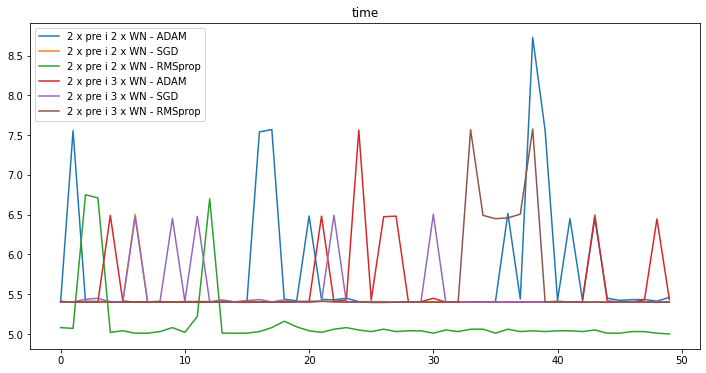

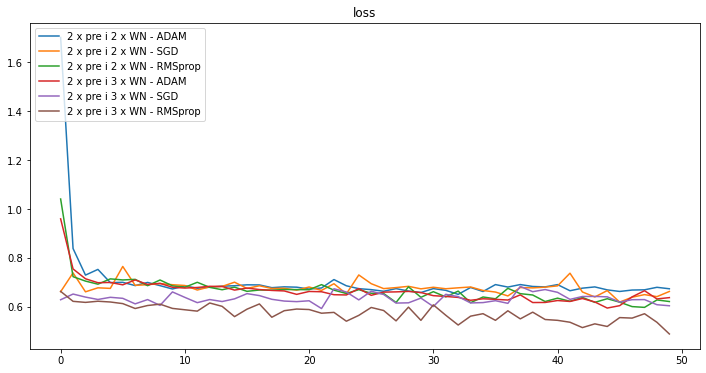

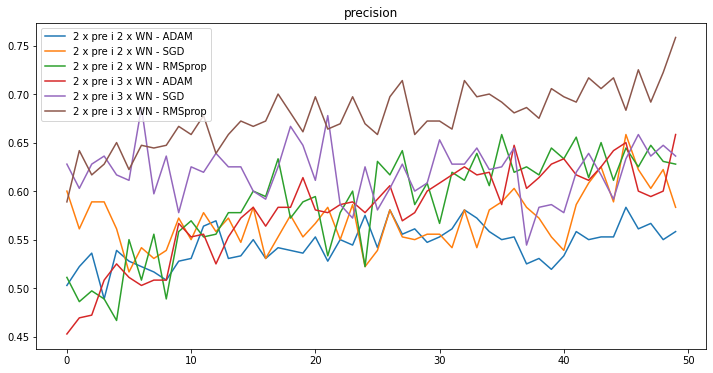

In [ ]:
for i in range(3):
  plt.figure(figsize=(12, 6))
  plt.plot(dwa_neuronowe_ADAM[:, i], label="2 x pre i 2 x WN - ADAM")
  plt.plot(dwa_neuronowe_SGD[:, i], label="2 x pre i 2 x WN - SGD")
  plt.plot(dwa_neuronowe_RMSprop[:, i], label="2 x pre i 2 x WN - RMSprop")
  plt.plot(trzy_neuronowe_ADAM[:, i], label="2 x pre i 3 x WN - ADAM")
  plt.plot(trzy_neuronowe_SGD[:, i], label="2 x pre i 3 x WN - SGD")
  plt.plot(trzy_neuronowe_RMSprop[:, i], label="2 x pre i 3 x WN - RMSprop")
  plt.title(titles[i])
  plt.legend(loc="upper left")
  plt.savefig(f"Best_plots_{titles[i]}.png", dpi=400)
  plt.show()